<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.4 Modelos en tiempo discreto </h3>
<h3 style="text-align: center;"> Ejercicios</h3>

### Ejercicio 1

Simular el proceso de incremento de un capital inicial $K_0$ sometido a un tipo de interés en los siguientes supuestos:

**a)** Suponer un tipo de interés simple y anual $i_a$, esto es, el interés se aplica una vez y se acumula al capital al final de cada año. Escribir la ecuación en diferencias que modela el proceso de acumulación de capital y resolverla analísticamente y por medio de simulaciones.

**b)** Suponer ahora que se aplica un tipo de interés diario $i_d$ al capital. Encontrar el tipo de interés diario con el cual se obtiene el mismo interés en un año que aplicando el tipo de interés anual anterior. Hallar la relación entre ambos tipos de interés (anual y diario) analítica y numéricamente.

**c)** Suponer que se toma el tiempo de forma continua, donde cada unidad de tiempo es un año. Encontrar la relación entre el tipo de interés anual simple $i_a$ (discreto) y compuesto $i_c$ (tiempo continuo), tanto analítica como numéricamente. 

Comenzamos con el apartado a), simulando el modelo de crecimiento de un capital $x_0$ sometido a un interés $i$, cuya ecuación es: 
$$x_{t+1} = (1+i) x_t.$$ 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


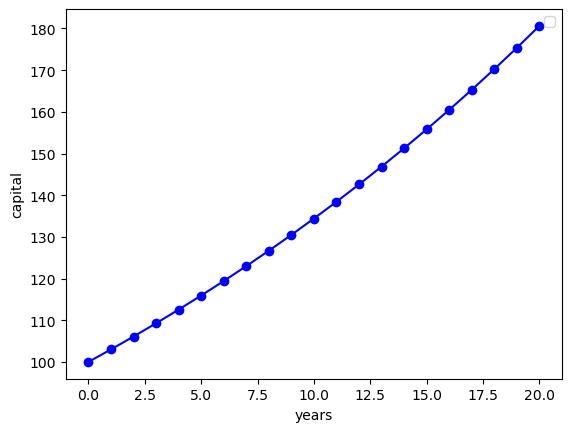

In [19]:
# LIBRERÍAS DE OPERACIONES
# ==============================================================================

import pandas as pd
import numpy as np

# LIBRERÍAS DE GRÁFICOS
# ==============================================================================
import matplotlib.pyplot as plt
#import seaborn as sn


# MODELO DE CRECIMIENTO PROPORCIONAL
# ==============================================================================

"""" definición del modelo"""
def fsys(x,t,i):
    xs=(1+i)*x
    return np.array([xs])

#def fsys(x,t,i):
#    return (1+i)*x

"""" definición de tiempo de simulación"""
t0=0
tf=20
t = np.linspace(t0, tf, int(tf-t0+1))

"""" valores iniciales de las variables de estado y parámetros"""
i = 0.03
x0=[100]

"""" dinámica del sistema"""

def solve_disc_model(f, x0, t, arg=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    #x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = f(x[i], t[i], *arg)
    return x

x = solve_disc_model(fsys ,x0,t,arg=(i,))
    
plt.plot(t,x,"bo-")
#plt.scatter(df.index,df.density,label='Real data')
plt.xlabel("years")
plt.ylabel("capital")
plt.legend()

plt.show()


Operando por recurrencia, la solución analítica es $x_t= (1+i)^t x_0$, $\forall t >0$. 

**b)** En este caso, simulamos el proceso de acumulación diaria de capital sometido a un tipo de interés $i_d$ y comparamos el capital obtenido en un año con el capital obtenido al aplicar un interés anual $i_a$.

Analíticamente, tendríamos que igualar $x_0(1+i_d)^{365} = x_0(1+i_a)$, del que despejando $i_d$ se obtiene: 

$$i_d= (1+i_a)^{1/365}-1.$$
Numéricamente lo aproximamos de la siguiente forma: 

103.0


C:\Users\usuario\AppData\Local\Temp\ipykernel_19504\3693286250.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sweep = pd.Series()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


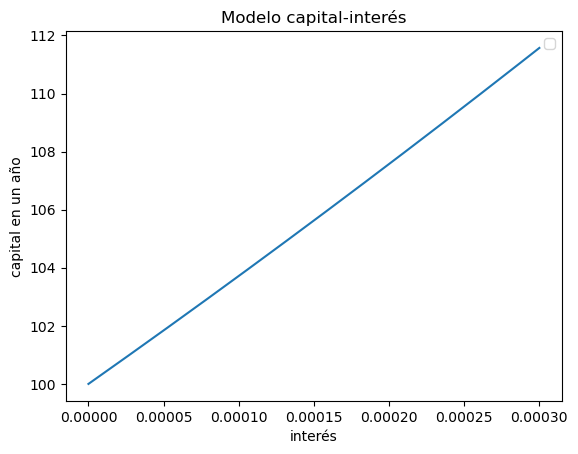

tipo de interés diario aproximado numéricamente 8.099999999999999e-05
tipo de interés diario exacto 8.098629905317623e-05


In [20]:
#COMPARACIÓN CASO DIARIO Y ANUAL 
# ==============================================================================

#INTERÉS ANUAL
i_anual=0.03

"""" definición de tiempo de simulación"""
t0=0
tf=1
t = np.linspace(t0, tf, int(tf-t0+1))

x = solve_disc_model(fsys ,x0,t,arg=(i_anual,))

capital_anual= x[-1,0]
print(capital_anual)

#INTERÉS DIARIO
i_array = np.linspace(0, 0.0003, 1001)

"""" definición de tiempo de simulación"""
t0=0
tf=365
t = np.linspace(t0, tf, int(tf-t0+1))

def sweep_i(i_array):
    sweep = pd.Series()
    for i in i_array:
        sol = solve_disc_model(fsys ,x0,t,arg=(i,))
        sweep[i] = sol[-1,0]
    return sweep

year_capital = sweep_i(i_array)

# visualization of beta effect
plt.plot(i_array, year_capital)
plt.xlabel('interés')
plt.ylabel('capital en un año')
plt.legend()
plt.title('Modelo capital-interés')
plt.show()


"""" interés diario"""

i_diario=i_array[np.min(np.where(year_capital>=capital_anual))]
print('tipo de interés diario aproximado numéricamente',i_diario)
i_diario_ex = (1+i_anual)**(1/365)-1
print('tipo de interés diario exacto',i_diario_ex)


**c)** El capital acumulado a un tipo de interés continuo $i_c$ sigue la expresión $\dot{x}=i_c x$, cuya solución es $x(t)= x_0e^{i_ct}$. Por tanto, igualando el capital obtenido en un año con un interés anual $i_a$, se sigue: 

$$x_0e^{i_c} = x_0(1+i_a) \Rightarrow i_c=\ln(1+i_a) $$
Numéricamente lo aproximamos de la siguiente forma: 

C:\Users\usuario\AppData\Local\Temp\ipykernel_19504\3987698413.py:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sweep = pd.Series()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


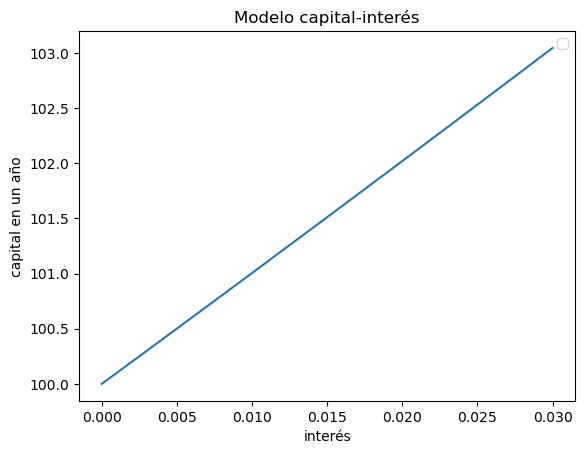

tipo de interés continuo aproximado 0.029699999999999997
tipo de interés continuo exacto 0.02955880224154443


In [22]:
#INTERÉS ANUAL
i_anual=0.03

"""" definición de tiempo de simulación"""
t0=0
tf=1
t = np.linspace(t0, tf, int(tf-t0+1))

x = solve_disc_model(fsys ,x0,t,arg=(i_anual,))

capital_anual= x[-1,0]

#INTERÉS ANUAL EN TIEMPO CONTINUO

"""" definición del modelo"""
def fsysc(x,t,i):
    dxdt=i*x
    return np.array([dxdt])

def solveODE_euler(f, x0, t,  arg=()):
    n = len(t)
    #x = np.zeros(n)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x


"""" definición del intervalo de tiempo"""
timestep = 0.001 
t0=0
tf=1
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" barrido de simulaciones"""

i_array = np.linspace(0, i_anual, 101)

def sweep_i(i_array):
    sweep = pd.Series()
    for i in i_array:
        sol = solveODE_euler(fsysc,x0,t,arg=(i,))

        sweep[i] = sol[-1,0]
    return sweep

year_capital = sweep_i(i_array)

# visualization of beta effect
plt.plot(i_array, year_capital)
plt.xlabel('interés')
plt.ylabel('capital en un año')
plt.legend()
plt.title('Modelo capital-interés')
plt.show()


"""" interés diario"""

i_cont=i_array[np.min(np.where(year_capital>=capital_anual))]
print('tipo de interés continuo aproximado',i_cont)
i_cont_ex = np.log(1+i_anual)
print('tipo de interés continuo exacto',i_cont_ex)


## Ejercicio 2

Este ejercicio presenta un modelo económico clásico en tiempo discreto, llamado **modelo de la telaraña**. Se asume un mercado de un cierto producto (e.g., productos agrícolas, como soja, arroz, café,...), cuyos precios se fijan periodo a periodo (años) por la ley de la oferta y demanda. Las suposiciones son las siguientes: 

- Supóngase $D(p_t)$ el producto demandado en el año $t$, que depende del precio $p_t$ del producto en ese año. Se asume una demanda lineal, por tanto, $D(p_t) = a -bp_t$, donde $a$ y $b$ son parámetros.
- Los productores toman decisiones de producción a partir de los precios de años anteriores. Por simplicidad, se asume que la oferta de ese producto en el año $t$ depende exclusivamente del precio del producto en el año anterior. Por tanto $S=S(p_{t-1})$.
- Se asume un mercado en competencia perfecta, por lo que el precio del producto en cada año se obtiene como resultado de igualarse las funciones de oferta y demanda, esto es $D(p_t)=S(p_{t-1})$. Despejando $p_t$ de esta ecuación se llega a:
  $$ p_t= \frac{a}{b} - \frac{S(p_{t-1})}{b}. $$

**a)** Asumir una función de oferta lineal creciente y estudiar la evolución de los precios del producto a largo plazo en función de los valores de los parámetros y un precio inicial del producto $p_0$. 

**b)** Supóngase ahora que la oferta anual se fija a partir de un precio esperado $p_t^e$. Las expectativas de precios se fijan a partir del precio y las expectativas de precios del año anterior de la forma:
  $$ p_t^e= (1-\alpha) p_{t-1} + \alpha p_{t-1}^e, $$
con $0 \leq \alpha \leq 1$ un parámetro que determina el peso de las expectivas de precios del año anterior en la expectivas de precios del año en curso. Realizar el mismo estudio del epígrafe anterior para esta nueva forma de fijación de la oferta, asumiendo el mismo precio inicial $p_0$ anterior y $p_1$ el dado por el epígrafe anterior. 


In [23]:
# LIBRERÍAS DE OPERACIONES
# ==============================================================================

import pandas as pd
import numpy as np

# LIBRERÍAS DE GRÁFICOS
# ==============================================================================
import matplotlib.pyplot as plt
#import seaborn as sn

Definimos la función de oferta y demanda: 

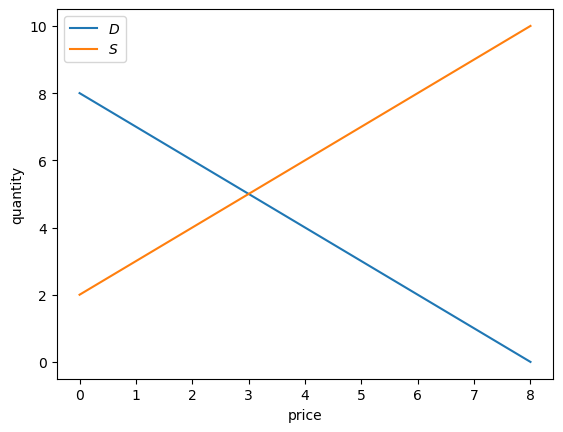

In [24]:
# MODELO DE LA TELARAÑA (ECONOMÍA)
# ==============================================================================

#see https://intro.quantecon.org/cobweb.html

def demand(p, a,b):
    return a - b * p

def supply(p, c,d):
    return c+d*p


"""" valores iniciales de las variables de estado y parámetros"""
a = 8
b=1
c=2
d=1

p_grid = np.linspace(0, 8, 200)

fig, ax = plt.subplots()
ax.plot(p_grid, demand(p_grid,a,b), label="$D$")
ax.plot(p_grid, supply(p_grid,c,d), label="$S$")
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()

plt.show()


a) Simulamos el modelo para distintos valores de los parámetros

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


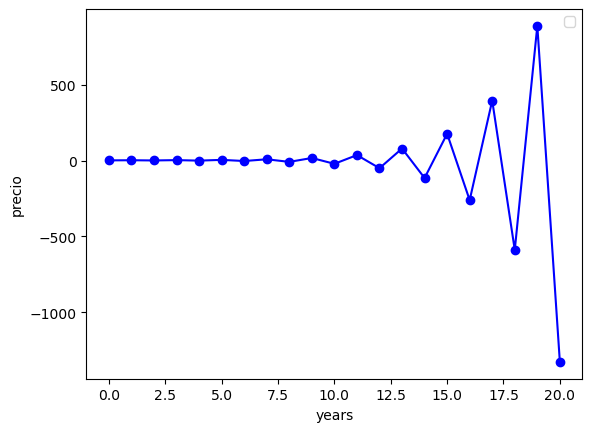

In [25]:
def g(p,t,a,b,c,d):
    """
    Function to find the next price given the current price
    and Market model
    """
    pss = - (supply(p,c,d) - a) / b
    return np.array([pss])


"""" definición de tiempo de simulación"""
t0=0
tf=20
t = np.linspace(t0, tf, int(tf-t0+1))


"""" valores iniciales de las variables de estado y parámetros"""
a = 8
b=1
c=2
d=1.5 # 1 oscilatorio, 0.5 convergente, 1.5 explosivo, 2 equilibrio
p0 = [2]

p = solve_disc_model(g ,p0,t,arg=(a,b,c,d))
    
plt.plot(t,p,"bo-")
#plt.scatter(df.index,df.density,label='Real data')
plt.xlabel("years")
plt.ylabel("precio")
plt.legend()

plt.show()


c) Tomamos ahora el caso de las expectativas adaptivas. El modelo dispone ahora de dos ecuaciones en diferencias, estas son: 

  $$ p_t= \frac{a}{b} - \frac{S(p_t^e)}{b}, $$
    $$ p_t^e= (1-\alpha) p_{t-1} + \alpha p_{t-1}^e, $$
    
  que sustituyendo la segunda ecuación en la primera, resulta: 
  
  $$ p_t= \frac{a}{b} - \frac{S((1-\alpha) p_{t-1} + \alpha p_{t-1}^e)}{b}, $$
    $$ p_t^e= (1-\alpha) p_{t-1} + \alpha p_{t-1}^e. $$
  
  Simulamos el modelo para las mismas condiciones anteriores, tomando unas expectativas iniciales dadas. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


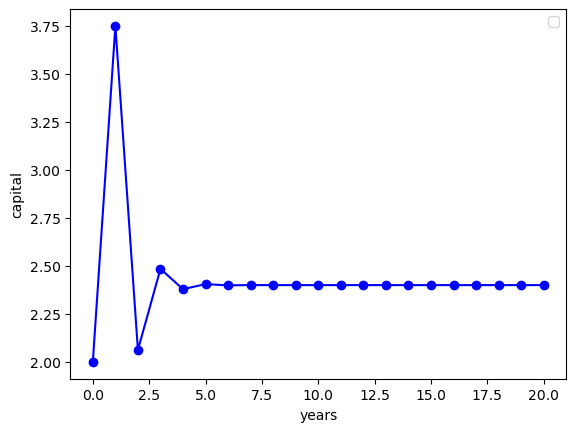

In [26]:
def ge(p,t,a,b,c,d,alpha):
    """
    Function to find the next price given the current price
    and Market model
    """
    ps  = - (supply((1-alpha)*p[0]+alpha*p[1],c,d) - a) / b
    pes = (1-alpha)*p[0]+alpha*p[1]
    return np.array([ps,pes])


"""" definición de tiempo de simulación"""
t0=0
tf=20
t = np.linspace(t0, tf, int(tf-t0+1))


"""" valores iniciales de las variables de estado y parámetros"""
a = 8
b=1
c=2
d=1.5
alpha=0.5
p0_0 = 2
p0_e = 1
p0=[p0_0,p0_e]

p = solve_disc_model(ge ,p0,t,arg=(a,b,c,d,alpha))
    
plt.plot(t,p[:,0],"bo-")
#plt.scatter(df.index,df.density,label='Real data')
plt.xlabel("years")
plt.ylabel("capital")
plt.legend()

plt.show()



Se observa que el rango de valores de los parámetros para el cual se alcanza el equilibrio de mercado es mayor. El ejercicio se puede completar haciendo gráficas correspondientes a rangos de valores de $\alpha$ y $d$. Se pueden encontrar más detalles del modelo de la telaraña en este link: https://intro.quantecon.org/cobweb.html

## Ejercicio 3

El **modelo de Leslie** representa la evolución de una población animal a partir de la población y distribución de las hembras por edades en cada instante de tiempo. Por simplicidad, presentamos el caso de tres grupos de edad. Las suposiciones del modelo son las siguientes: 

- Cada hembra perteneciente al grupo $i$ tiene exactamente $b_i \geq 0$ descendientes hembras en cada periodo de tiempo, con $i=\{1,2,3\}$.
- También en cada periodo de tiempo sobrevive un porcentaje $0 \leq c_i \leq 1$ de hembras pertenecientes el grupo $i$, que pasan al siguiente grupo, con $i=\{1,2,3\}$. Se toma $c_3=0$.
- La matriz
$$L=\left[ \begin{array}{lll} b_1 & b_2 & b_3 \\ c_1 &  0 &  0\\ 0 & c_2 & 0 \end{array}\right]$$
representa la matriz de reproducibilidad de las hembras en la población y se denomina **matriz de Leslie**. Entonces, dada una población de hembras en el tiempo $t$ de $x_t=[x_t^1,x_t^2,x_t^3]$, la población de hembras en el periodo siguiente sigue la ecuación:
$$x_{t+1}= Lx_t$$


**a)** Asúmase una población de insectos con la siguiente matriz de Leslie:
$$L=\left[ \begin{array}{lll} 0 & 3 & 1 \\ 0.3 &  0 &  0\\ 0 & 0.5 & 0 \end{array}\right].$$
Dada una población inicial de hembras de $x_0=[1000,2000,3000]$, calcular la población y distribución (porcentaje) por edades de hembras a medio plazo $t \simeq 20$ y a largo plazo $t \simeq 50$. ¿Tiende a extinguirse la población? Cambiar la población inicial de hembras y observar si la población tenderá a extinguirse o no para alguno de los valores y la distribución final de hembras.

**b)** Repítase el mismo ejercicio anterior con la siguiente matriz de reproducibilidad de las hembras:
$$L=\left[ \begin{array}{lll} 0 & 3 & 1 \\ 0.2 &  0 &  0\\ 0 & 0.5 & 0 \end{array}\right].$$
De nuevo estudiar si la población tiende a extinguirse para distingos valores de población inicial de hembras.

**c)** En las condiciones del apartado a) se lleva a cabo un programa de control de la población de insectos a través de una reducción simultánea de hembras a una tasa $0 \leq d \leq 1$ dada, homogénea para todos los grupos de edad. Encontrar la tasa $d$ con la que la población de insectos permanece estable a largo plazo.  

En primer lugar, se resuelve analíticamente. 

Antes presentamos los siguientes resultados previos: 

**Lema 1:** Dada una matriz del tipo: 
$$L=\left[ \begin{array}{lll} b_1 & b_2 & b_3 \\ c_1 &  0 &  0\\ 0 & c_2 & 0 \end{array}\right]$$
con las condiciones: 
- $ b_i \geq 0, \forall i \in \{1,2,3\}.$
- Al menos dos valores $b_i$ consecutivos son distintos de cero. 
- $ 0 < c_i \leq 1, \forall i \in \{1,2\}.$

Entonces la matriz $L$ tienen un único valor propio $\lambda_1 >0$, de multiplicidad 1, y todas las componentes de su vector propio asociado $v_1$ son positivas. Además cualquier otro valor propio $\lambda  \neq \lambda_1$ satisface que $|\lambda| <\lambda_1.$

Demostración: Se deja como ejercicio. 

**Lema 2:** Dada una distribución inicial de hembras $x_0$, la solución de la ecuación $x_{t+1}= Lx_t$ es 
$$x_{t}= L^tx_0.$$
Demostración: Sencillo por recurrencia. 


a) En primer lugar, vamos simular el proceso aplicando el Lema 2

In [27]:
# MODELO DE LESLIE
# ==============================================================================
import numpy as np
import numpy.linalg as LA

#distribución de nuevos nacimientos y sobrevivencia de la población
L=np.array([[0,3,1],[0.3,0,0],[0,0.5,0]])

#vector inicial de la poblacion por grupos de edad
x0=np.array([[1000],[2000],[3000]])

#simulación largo plazo y distribución
t_st=50
x_st= np.dot(LA.matrix_power(L,t_st),x0)
fem_prop_st=x_st/np.sum(x_st)

print('Fem. dist at LT = {}'.format(fem_prop_st))
print('Population at LT = {}'.format(x_st))


Fem. dist at LT = [[0.69608127]
 [0.2041616 ]
 [0.09975713]]
Population at LT = [[15695.81660492]
 [ 4603.60475932]
 [ 2249.40642597]]


Se puede comprobar que la distribución de las hembras permanece constante para valores más altos de $t$, y que es independiente de los valores iniciales de la población. En el tiempo $t=20$ todavía no se alcanza esa distribución estable pero está cercana: 

In [28]:
#simulación largo plazo y distribución
t_st=20
x_st= np.dot(LA.matrix_power(L,t_st),x0)
fem_prop_st=x_st/np.sum(x_st)

print('Fem. dist at LT = {}'.format(fem_prop_st))
print('Population at LT = {}'.format(x_st))

Fem. dist at LT = [[0.68947281]
 [0.21276054]
 [0.09776665]]
Population at LT = [[7740.80327554]
 [2388.69099022]
 [1097.63921188]]


Por otro lado, aplicando el Lema 1 y dado que la matriz $L$ es diagonalizable, o sea, tiene tres valores propios $\lambda_i$ y tres vectores propios $v_i$ independientes, con $i=\{1,2,3\}$, se demuestra que existen números reales $a_i$, con $i=\{1,2,3\}$ tal que: 
$$x_0= a_1v_1+a_2v_2+a_3v_3.$$
Entonces,
$$x_{t}= L^tx_0 = L^t(a_1v_1+a_2v_2+a_3v_3) = a_1L^tv_1+a_2L^tv_2+a_3L^tv_3 = a_1\lambda_1^tv_1+a_2\lambda_2^tv_2+a_3\lambda_3^tv_3,$$
y sacando factor común se tiene
$$x_{t}= \lambda_1^t\left( a_1v_1+a_2\left(\frac{\lambda_2}{\lambda_1}\right)^tv_2+a_3\left(\frac{\lambda_2}{\lambda_1}\right)^tv_3\right).$$
Dado el Lema 1, cuando $t>>0$, tenemos: 
$$x_{t} \simeq a_1v_1\lambda_1^t.$$
Por tanto, la población crecerá si $\lambda_1>1$, se extinguirá cuando $\lambda_1<1$ y permanecerá estable cuando $\lambda_1=1$. Además, la distribución de la población por grupos de edad a largo plazo se determina por la distribución de las componentes del vector propio $v_1 = [v_1^1,v_1^2,v_1^3].$

Aplicamos directamente este resultado a la matriz de Leslie del apartado a). 


In [29]:
#solución exacta
dL, VL = LA.eig(L)

print('Eigenvalues = {}'.format(dL))
print('Eigenvectors = {}'.format(VL))

#x_lambd1= np.dot(L,VL[:,0])

fem_prop=VL[:,0]/np.sum(VL[:,0])
print('Distribución a largo plazo de la población de hembras:',fem_prop)


Eigenvalues = [ 1.02304502 -0.85068938 -0.17235564]
Eigenvectors = [[ 0.95064458 -0.92555739  0.18403341]
 [ 0.27876913  0.32640259 -0.32032617]
 [ 0.1362448  -0.19184593  0.9292593 ]]
Distribución a largo plazo de la población de hembras: [0.69610709 0.20412799 0.09976491]


Como el primer valor propio es $\lambda_1>1$, la población crecerá. La distribución derivada del vector propio $v_1$ coincide con la obtenida numéricamente. 

b) En este caso se calcula directamente los valores y vectores propios: 

In [30]:
L=np.array([[0,3,1],[0.2,0,0],[0,0.5,0]])

#vector inicial de la poblacion por grupos de edad
x0=np.array([[4000],[2000],[1000]])

#solución exacta
dL, VL = LA.eig(L)
VLt = np.transpose(VL)

print('Eigenvalues = {}'.format(dL))
print('Eigenvectors = {}'.format(VL))

#x_lambd1= np.dot(L,VL[:,0])

fem_prop=VL[:,0]/np.sum(VL[:,0])
print('Distribución a largo plazo de la población de hembras:',fem_prop)


Eigenvalues = [ 0.84735707 -0.67164929 -0.17570778]
Eigenvectors = [[ 0.96443801 -0.93748713  0.27964962]
 [ 0.22763438  0.27915972 -0.31831217]
 [ 0.13432022 -0.20781658  0.9057999 ]]
Distribución a largo plazo de la población de hembras: [0.72711353 0.17161916 0.10126732]


En este caso, $\lambda_1<1$, la población tiende a extinguirse dada cualquier distribución inicial de la población de hembras. 

c) Ahora el modelo es el siguiente: 

$$x_{t+1}= Lx_t-dLx_t= (1-d)Lx_t,$$

ya que en cada periodo se elimina un porcentaje $d$ de la población, idéntico para cada grupo de edad. Haremos uso del siguiente lema: 

**Lema 3:** Dada una matriz de números reales cuadrada cualquiera $A$ y $\alpha \in \Re$. Entonces si $\lambda$ un valor propio de $A$, $\alpha\lambda$ es un valor propio de $\alpha A$. 
Demostración: Si $\lambda$ es un valor propio de $A$, entonces por definición tenemos que existe un vector $v$ tal que $Av=\lambda v$. Entonces $\alpha Av= \alpha \lambda v$, por lo que $\alpha \lambda$ es valor propio de $\alpha A$ con el mismo valor propio $v$ asociado. 

Entonces, aplicando el Lema 3, dado $\lambda_1$ el valor propio positivo de $L$, $(1-d)\lambda_1$ es el valor propio positivo de $(1-d)L$. Para que la población en este modelo con extracción permanezca estable se tiene que cumplir: 
$$(1-d)\lambda_1= 1 \Rightarrow d= 1-\frac{1}{\lambda_1}$$
que es aproximadamente $d= 1- 1/1.023 \simeq 0.022$.

Por tanto, la tasa de extracción en la que la población de insectos permanece estable es un 2.2% por ciclo, aproximadamente. 